## Use MCMC for Simple Optimizations

In [1]:
import numpy as np
from matplotlib import pyplot as plt

### Use MCMC to Optmize the Area of Rectangle Given a Fixed Perimeter

Let's consider an enclosed rectangular fence with side lengths $x$ and $y$. If we assume that the fence must have a fixed perimeter $p$, what side lengths give the largest enclosed area? This is an optimization in 1 dimension because we can relate $y=\dfrac{p}{2}-x$. We also know the area enclosed is then equal to $A(x)=xy=x(\dfrac{p}{2}-x)$. We also must restrict both side lengths to be greater than 0. We can apply this restriction by taking $A(x)\geq0$. Let's try to solve this problem using a MCMC simulation.

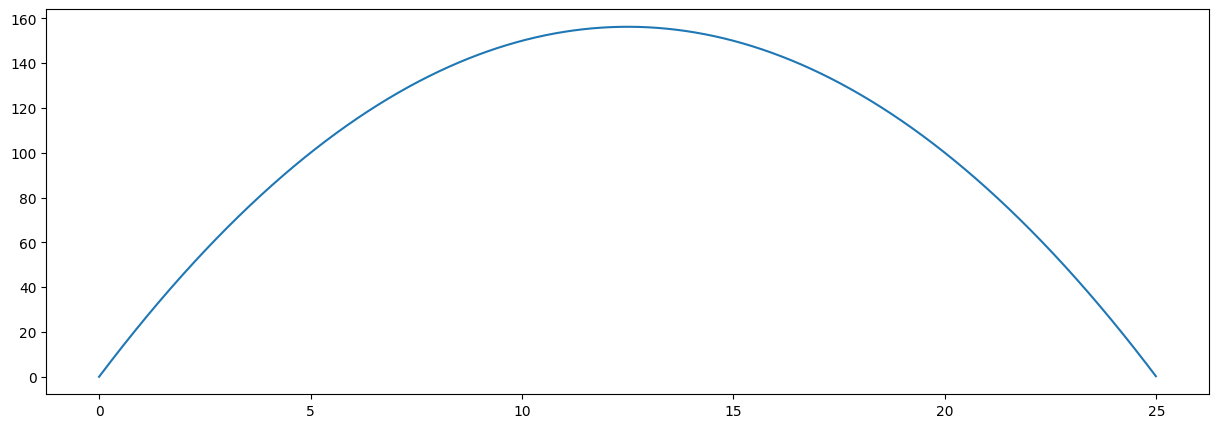

In [18]:
def Area(x, p):
    '''
    Returns the area enclosed by a rectangle
    with a given side length and perimeter
    '''
    area =  x * ((p / 2) - x)
    return area

x_pts = np.arange(0, 25, 0.01)
y_pts =Area(x_pts, 50)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(x_pts, y_pts, '-')
plt.show()

### Approach

Let's use the Metropolis algorithm to find the solution to this problem. For our acceptance probability we can just take the ratio of the areas between the candidate state and current state.

In [9]:
def GetNextState(current_state, perimeter, stdv):
    '''
    Returns the next point in the Markov Chain based
    on the Metropolis algorithm using a normal distribution
    with a specified standard deviation.
    '''
    candidate_state = np.random.normal(current_state, stdv)
    acceptance_prob = Area(candidate_state, perimeter) / Area(current_state, perimeter)
    random_number   = np.random.uniform()

    if random_number <= acceptance_prob:
        next_state = candidate_state
        accepted   = True
    else:
        next_state = current_state
        accepted   = True
    
    return next_state, accepted

### Running the Markov Chain Monte Carlo

In [41]:
perimeter = 50

initial_state = 15
num_samples   = 500000
standard_dev  = 1
burnin        = 100

states = np.zeros(num_samples - burnin)

current_state = initial_state

for i in np.arange(num_samples):
    next_state = GetNextState(current_state, perimeter, standard_dev)[0]
    current_state = next_state
    if i <= burnin:
        continue
    states[i - burnin] = current_state

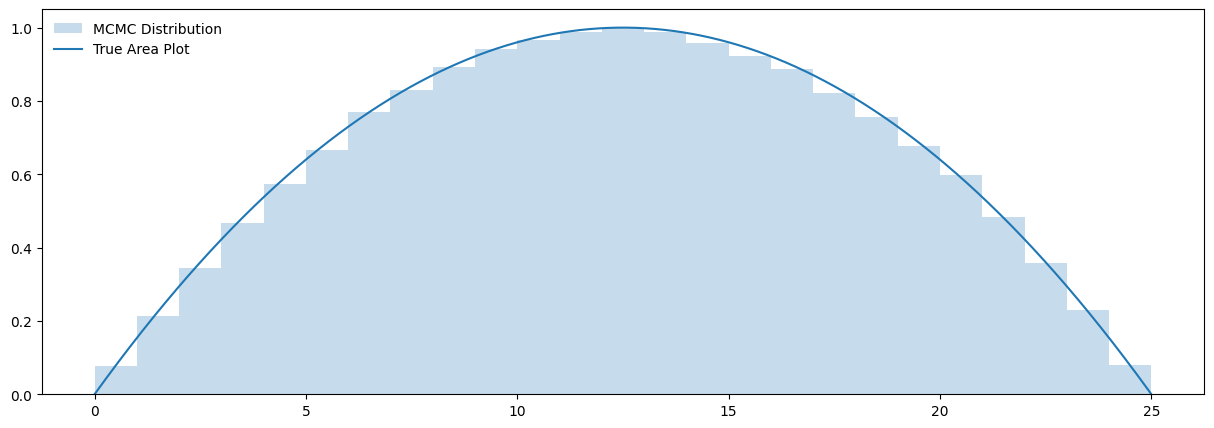

In [42]:
# Plot setup
# ---------------------------------------------------
bin_width = 1
bins      = np.arange(0, 25 + bin_width, bin_width)

# Normalize mcmc distribution to peak at 1
mcmc_normalization = 1 / np.max(ax.hist(states, bins=bins)[0]) * np.ones(len(states))

'''
Plot mcmc simulation
'''
fig, ax = plt.subplots(figsize=(15, 5))

mcmc_dist = ax.hist(states, bins=bins, weights=mcmc_normalization, color='C0', alpha=0.25, label='MCMC Distribution')[0]
ax.plot(x_pts, y_pts / np.max(y_pts), '-', color='C0', label='True Area Plot')

plt.legend(fontsize=10, loc='upper left', frameon=False, framealpha=0)
plt.show()

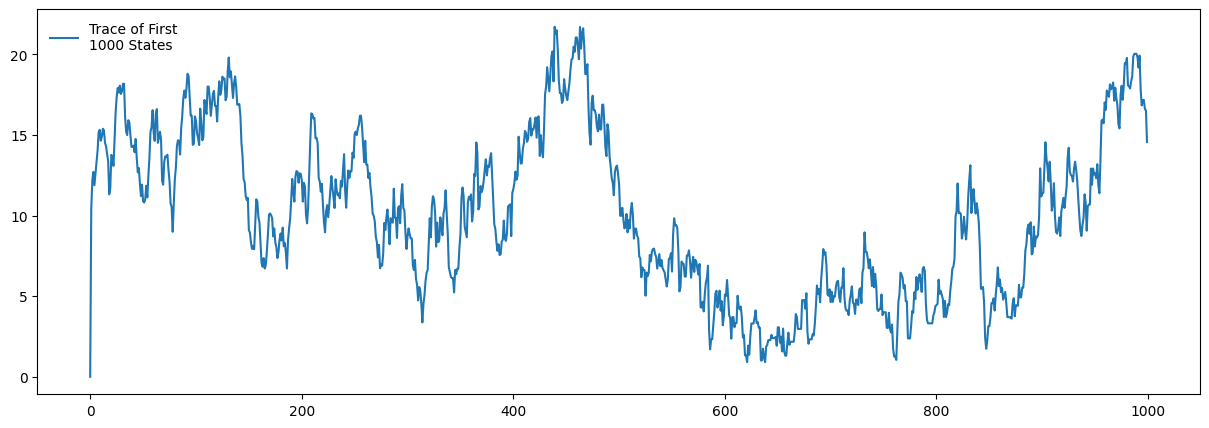

In [43]:
num_states = 1000

'''
Plot trace
'''
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(np.arange(len(states[0:num_states])), states[0:num_states], '-', color='C0', label=f'Trace of First\n{num_states} States')

plt.legend(fontsize=10, loc='upper left', frameon=False, framealpha=0)
plt.show()

### Results

Let's just take the peak bin value in our MCMC distribution as the result.

In [67]:
mcmc_values, mcmc_bins = ax.hist(states, bins=bins)[0:2]
maximum_bin_edge        = mcmc_bins[np.where(mcmc_values == np.max(mcmc_values))[0]][0]

result = maximum_bin_edge + (bin_width / 2)

print(fr'The optimized length for side x is {result}. This gives length y as {perimeter/2 - result}.')

The optimized length for side x is 12.5. This gives length y as 12.5.
